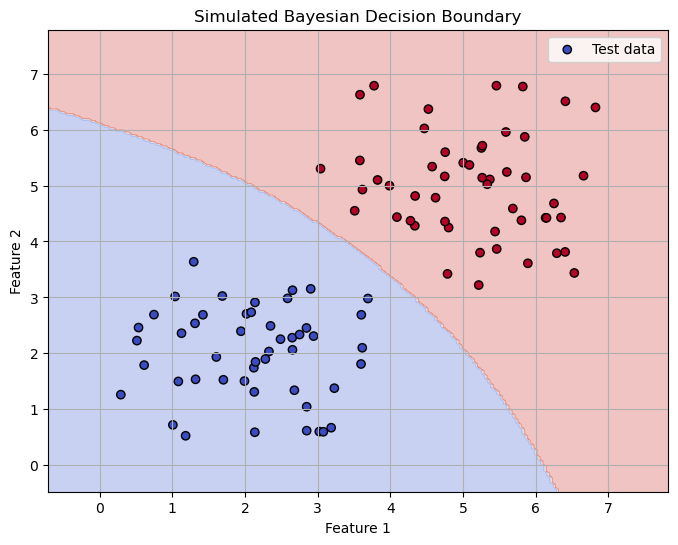

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Simulate realistic class data
np.random.seed(42)

# Class 1 ("train_x" like)
train_x_mean = np.array([2.0, 2.0])
train_x_cov = np.array([[1.0, 0.2], [0.2, 1.0]])
test_x = np.random.multivariate_normal(train_x_mean, train_x_cov, 50)
test_x_label = np.ones(50)

# Class 2 ("train_y" like)
train_y_mean = np.array([5.0, 5.0])
train_y_cov = np.array([[1.0, -0.3], [-0.3, 1.0]])
test_y = np.random.multivariate_normal(train_y_mean, train_y_cov, 50)
test_y_label = np.full(50, 2)

# Combine into one dataset
test_xy = np.vstack([test_x, test_y])
test_xy_label = np.hstack([test_x_label, test_y_label])

# Priors (equal)
prior_x = 0.5
prior_y = 0.5

# Likelihood function
def likelihood(data, mean, cov):
    return multivariate_normal.pdf(data, mean=mean, cov=cov)

# Compute likelihoods for test data
likelihood_x = likelihood(test_xy, train_x_mean, train_x_cov)
likelihood_y = likelihood(test_xy, train_y_mean, train_y_cov)

# Compute posteriors (unnormalized)
posterior_x = prior_x * likelihood_x
posterior_y = prior_y * likelihood_y

# Classify test points
classification = np.where(posterior_x > posterior_y, 1, 2)

# Create grid for plotting decision boundary
x_min, x_max = test_xy[:, 0].min() - 1, test_xy[:, 0].max() + 1
y_min, y_max = test_xy[:, 1].min() - 1, test_xy[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute grid likelihoods and predict
grid_likelihood_x = likelihood(grid, train_x_mean, train_x_cov) * prior_x
grid_likelihood_y = likelihood(grid, train_y_mean, train_y_cov) * prior_y
grid_predictions = np.where(grid_likelihood_x > grid_likelihood_y, 1, 2)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(test_xy[:, 0], test_xy[:, 1], c=classification, cmap='coolwarm', edgecolor='k', label='Test data')
plt.title("Simulated Bayesian Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()
